In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import extract_correct_csv


plt.rcParams["figure.autolayout"] = True

In [2]:
data_ = pd.read_csv('data/gaze/fixations.csv')
fixations_real = pd.read_csv('/Users/marcoghezzi/PycharmProjects/pythonProject/fixations_aligned.csv')
subs = extract_correct_csv.extract_only_valid_subject()
trials = [17, 34]
delta_y, delta_x = 1080 / 2 - 676 / 2, 1920 / 2 - 642 / 2
print(len(subs))
len(trials)*len(subs)

30


60

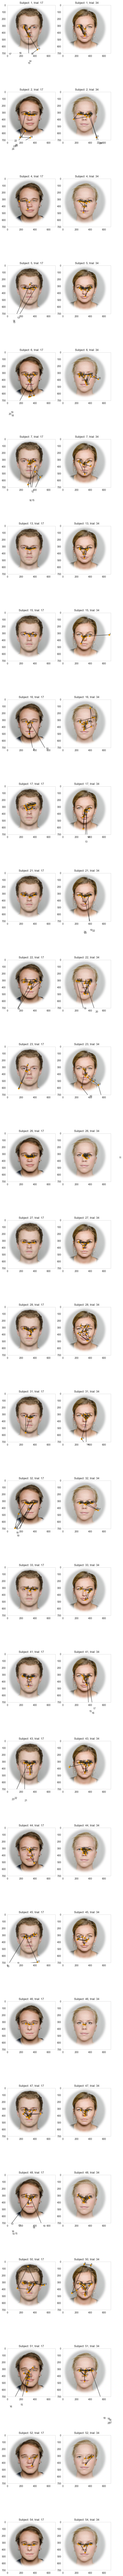

In [3]:
fig, axs = plt.subplots(len(subs), len(trials), figsize = (8, 150), )

custom_xlim = (0, 700)
custom_ylim = (700,0)

plt.setp(axs, xlim=custom_xlim, ylim=custom_ylim)
i = 0
for sub in subs:
    j = 0
    for trial in trials:
        axs[i,j].grid(False)
        data_sub_trial = data_[(data_.Subject == sub) & (data_.Trial==trial)]
        x_points = data_sub_trial.X_Coord.values-delta_x
        y_points = data_sub_trial.Y_Coord.values-delta_y

        fixations_sub = fixations_real[fixations_real['RECORDING_SESSION_LABEL'] == sub]
        x_points_real = np.array(fixations_sub[fixations_sub['TRIAL_LABEL'] == trial]['CURRENT_FIX_X'] - delta_x)
        y_points_real = np.array(fixations_sub[fixations_sub['TRIAL_LABEL'] == trial]['CURRENT_FIX_Y'] - delta_y)
        string_sub = extract_correct_csv.read_correct_subject_csv(sub)
        true_image = pd.read_csv('data/newLookAtMe/newLookAtMe' + string_sub + '.csv')
        true_image = true_image[true_image['trial'] == trial]['picName'].iloc[0][5:]
        path = '/Users/marcoghezzi/PycharmProjects/pythonProject/osfstorage-archive-info/stim/' + true_image
        picture = np.asarray(Image.open(path))
        axs[i, j].imshow(picture)
        axs[i, j].scatter(x_points_real, y_points_real, color = 'orange')
        for a in range(len(x_points_real)):
            axs[i, j].text(x_points_real[a], y_points_real[a], a+1)
        axs[i, j].plot(x_points_real, y_points_real, color = 'black', linestyle='-', alpha=0.7)
        axs[i, j].set_title(f'Subject: {sub}, trial: {trial}')
        #plt.scatter(x_points, y_points, label='CONVERSANO')
        #plt.scatter(x_points_real, y_points_real, )
        #plt.text(x_)

        #plt.legend()
        j = j+1

    i = i+1



## sPPCA results with gaze

In [4]:
only_gaze_df = pd.read_csv('output/sppca_gaze.csv')
all_views_df = pd.read_csv('output/sppca_physio_gaze.csv')
print(f'only gaze shape: ({only_gaze_df.shape}), all views shape: ({all_views_df.shape})')

only gaze shape: ((630, 6)), all views shape: ((504, 5))


### only gaze, average all subject

In [5]:
def plot_function(df, labelplot1, labelplot2, sub = None):
    columns = ['subject','fold']
    if 'feature' in df.columns:
        columns.append('feature')
    copy_df = df.copy(deep=False)
    if sub:
        copy_df = df[df.subject==sub]
    #print(copy_df.shape)
    gaze_avg = copy_df.drop(columns=columns).groupby(by='k', as_index=False).mean()
    gaze_std = copy_df.drop(columns=columns).groupby(by='k', as_index=False).std()

    X = gaze_avg.k.unique()
    y_1 = gaze_avg.train.values
    deviation_1 = gaze_std.train.values

    y_2 = gaze_avg.test.values
    deviation_2 = gaze_std.test.values

    plt.axes().set_facecolor('#AACAEF')
    plt.plot(X, y_1,'#003566', label=labelplot1)
    plt.fill_between(X, y_1-deviation_1, y_1+deviation_1, alpha=0.08, color = '#003566')
    plt.plot(X, y_2, '#840232', label=labelplot2)
    plt.fill_between(X, y_2-deviation_2, y_2+deviation_2, alpha=0.08, color = '#840232')
    plt.xticks(X)
    plt.grid(visible=None)
    plt.xlabel('Latent space dimension', fontsize=11)
    plt.ylabel('Accuracy', fontsize=11)
    plt.legend()
    plt.show()


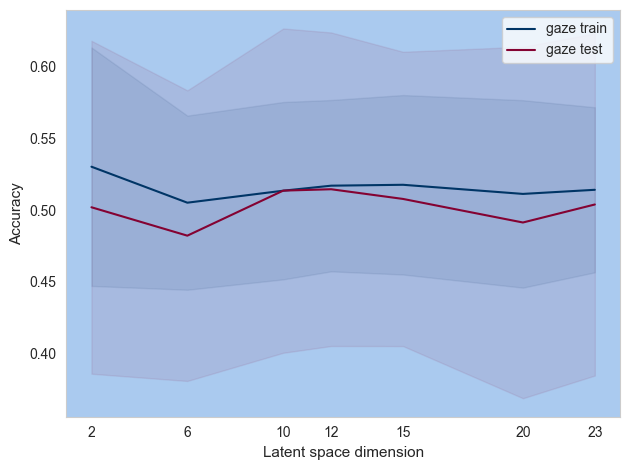

In [6]:
plot_function(only_gaze_df, 'gaze train', 'gaze test')

### only gaze, best subject

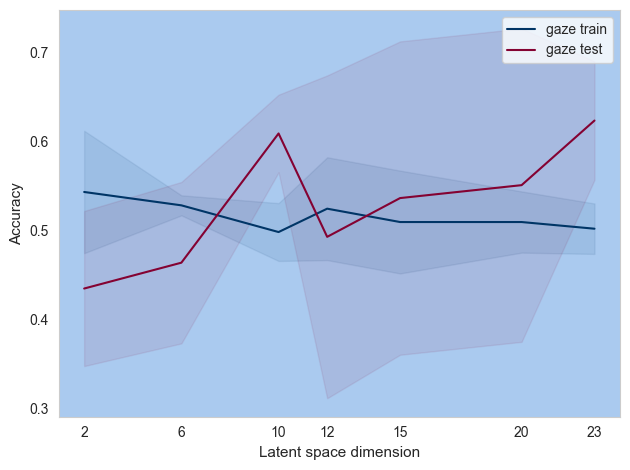

In [7]:
sub = 2
plot_function(only_gaze_df, 'gaze train', 'gaze test', sub)

### all views, average all subjects

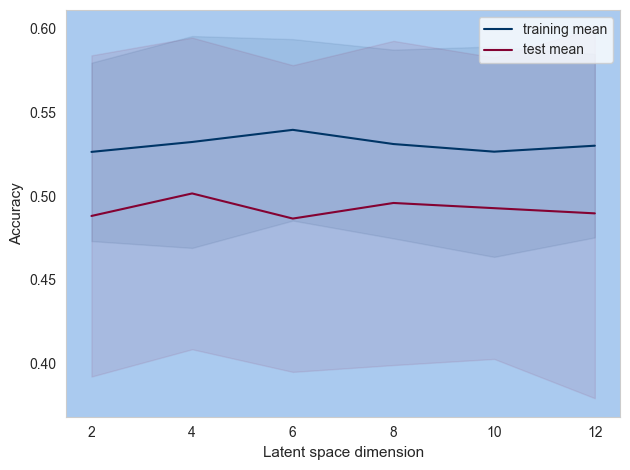

In [8]:
plot_function(all_views_df, 'training mean', 'test mean')

### all views, best subject

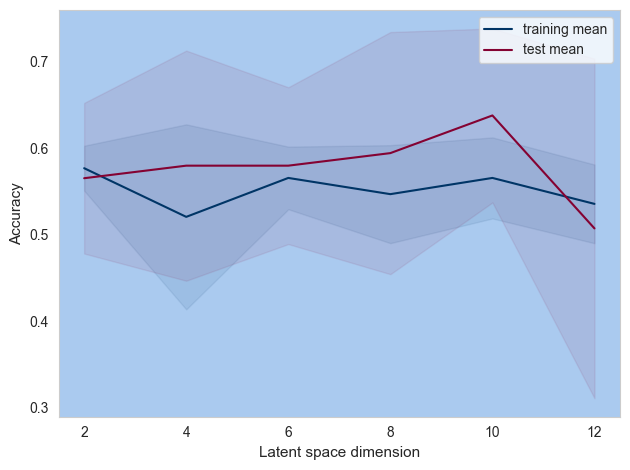

In [9]:
plot_function(all_views_df, 'training mean', 'test mean', 2)

In [31]:
lds_df = pd.read_csv('data/lds_subjects.csv')
sias_df = pd.read_csv('data/sias_score.csv')
list_sub_sias = sias_df.sort_values(by='sias_score', ascending=True)[:10]['subject'].unique()
list_sub_lds = lds_df.sort_values(by='lds', ascending=False)[:10]['subject'].unique()

list_sub_sias_more = sias_df.sort_values(by='sias_score', ascending=False)[:10]['subject'].unique()
list_sub_lds_more = lds_df.sort_values(by='lds', ascending=True)[:10]['subject'].unique()

In [32]:
less_gen_LDS = all_views_df[all_views_df.subject.isin(list_sub_lds)]
less_gen_sias = all_views_df[all_views_df.subject.isin(list_sub_sias)]

more_gen_LDS = all_views_df[all_views_df.subject.isin(list_sub_lds_more)]
more_gen_sias = all_views_df[all_views_df.subject.isin(list_sub_sias_more)]

## Low fear gen subjects

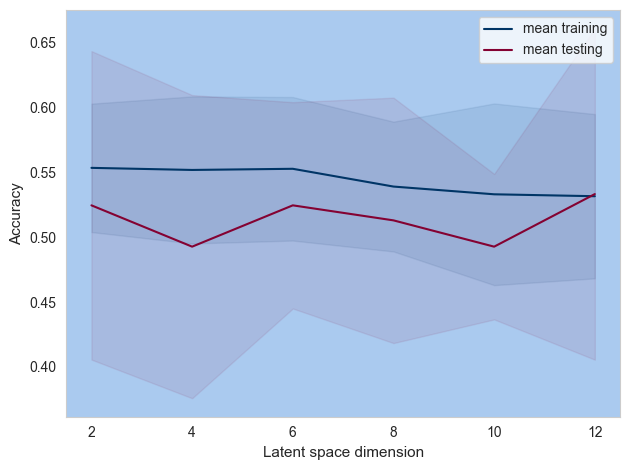

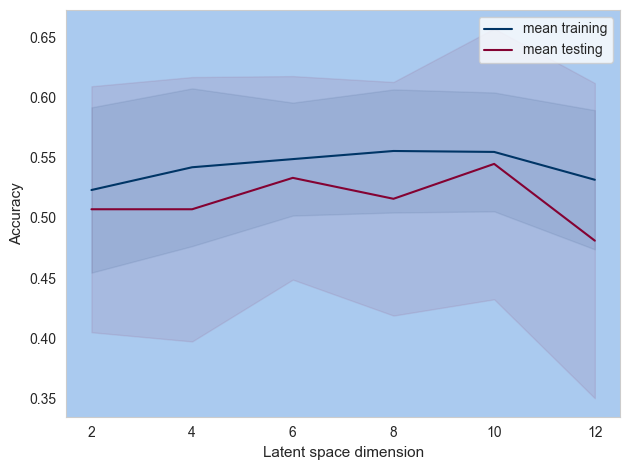

In [34]:
plot_function(less_gen_LDS, 'mean training', 'mean testing')
plot_function(less_gen_sias, 'mean training', 'mean testing')

## High fear subjects

In [39]:
less_gen_sias

subject   k  fold     train      test
18         2   2     0  0.561798  0.652174
19         2   2     1  0.561798  0.565217
20         2   2     2  0.606742  0.478261
21         2   4     0  0.415730  0.434783
22         2   4     1  0.516854  0.695652
..       ...  ..   ...       ...       ...
463       51  10     1  0.651685  0.434783
464       51  10     2  0.539326  0.565217
465       51  12     0  0.505618  0.478261
466       51  12     1  0.550562  0.260870
467       51  12     2  0.483146  0.565217

[90 rows x 5 columns]

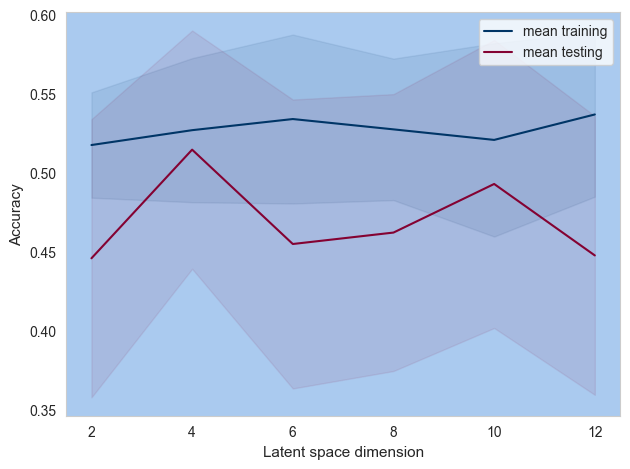

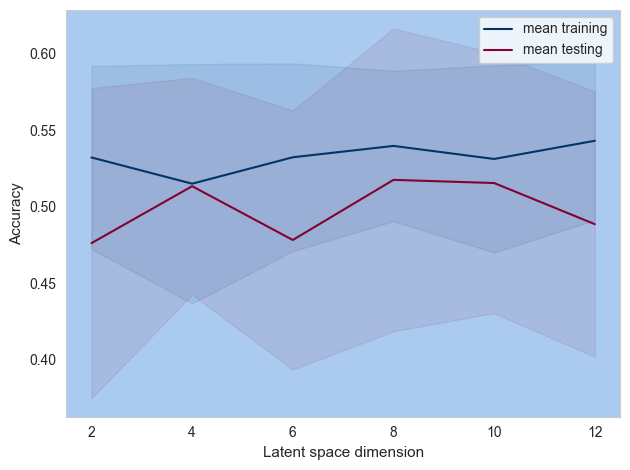

In [35]:
plot_function(more_gen_LDS, 'mean training', 'mean testing')
plot_function(more_gen_sias, 'mean training', 'mean testing')